In [ ]:
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.close("all")

In [ ]:
Models = ['ECMWF-EU', 'GEM-CA', 'GFS-US', 'ICON-DE', 'JMA-JP', 'MET-NO', 'OPEN-METEO']

In [ ]:
ECMWFData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_ECMWFEU.pkl')
ECMWFDataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_ECMWFEU.pkl')
ECMWFData['Model'] = 'ECMWF-EU'
ECMWFDataDiff['Model'] = 'ECMWF-EU'

In [ ]:
GEMCAData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_GEMCanada.pkl')
GEMCADataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_GEMCanada.pkl')
GEMCAData['Model'] = 'GEM-CA'
GEMCADataDiff['Model'] = 'GEM-CA'

In [ ]:
GFSUSData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_GFSUSA.pkl')
GFSUSDataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_GFSUSA.pkl')
GFSUSData['Model'] = 'GFS-US'
GFSUSDataDiff['Model'] = 'GFS-US'

In [ ]:
ICONDEData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_ICONGermany.pkl')
ICONDEDataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_ICONGermany.pkl')
ICONDEData['Model'] = 'ICON-DE'
ICONDEDataDiff['Model'] = 'ICON-DE'

In [ ]:
JMAJPData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_JMA-JP.pkl')
JMAJPDataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_JMA-JP.pkl')
JMAJPData['Model'] = 'JMA-JP'
JMAJPDataDiff['Model'] = 'JMA-JP'

In [ ]:
METNOData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_METNO.pkl')
METNODataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_METNO.pkl')
METNOData['Model'] = 'MET-NO'
METNODataDiff['Model'] = 'MET-NO'

In [ ]:
OPENData = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_OPEN-METEO.pkl')
OPENDataDiff = pd.read_pickle('/home/lali/TITAN-ROG-sync/python/METEO/Rez_diff_OPEN-METEO.pkl')
OPENData['Model'] = 'OPEN-METEO'
OPENDataDiff['Model'] = 'OPEN-METEO'

In [ ]:
frames = [ECMWFData, GEMCAData, GFSUSData, ICONDEData, JMAJPData, METNOData, OPENData]
allData = pd.concat(frames)
framesDiff = [ECMWFDataDiff, GEMCADataDiff, GFSUSDataDiff, ICONDEDataDiff, JMAJPDataDiff, METNODataDiff, OPENDataDiff]
allDataDiff = pd.concat(framesDiff)

In [ ]:
allData = allData.iloc[:, :-1]
#list(allData.columns.values)
allData.columns = ['Real', '0h', '6h', '12h', '18h', '24h', '30h', '36h', '42h', '48h', '54h', '60h', '66h', '72h', '78h', '84h', '90h', '96h', '102h', '108h', '114h', '120h', '126h', '132h', '138h', '144h', '150h', '156h', '162h', '168h', '174h', '180h', '186h', '192h', '198h', '204h', '210h', '216h', '222h', '228h', '234h', '240h', 'Model']
#list(allData.columns.values)
del allData['234h']
del allData['240h']
allData = allData.reset_index()

In [ ]:
allDataDiff = allDataDiff.iloc[:, :-1]
#list(allDataDiff.columns.values)
allDataDiff.columns = ['Real', '0h', '6h', '12h', '18h', '24h', '30h', '36h', '42h', '48h', '54h', '60h', '66h', '72h', '78h', '84h', '90h', '96h', '102h', '108h', '114h', '120h', '126h', '132h', '138h', '144h', '150h', '156h', '162h', '168h', '174h', '180h', '186h', '192h', '198h', '204h', '210h', '216h', '222h', '228h', '234h', '240h', 'Model']
#list(allDataDiff.columns.values)
del allDataDiff['234h']
del allDataDiff['240h']
allDataDiff = allDataDiff.reset_index()

In [ ]:

#sns.displot(allDataDiff, x="0h", hue="Model", stat="density")
#sns.displot(allDataDiff, x="0h", hue="Model", kind="kde", fill=True)

In [ ]:
plotAllDataDiff = allDataDiff[['Real', '0h', '24h', '48h', 'Model']]
#sns.displot(plotAllDataDiff, x="0h", hue="Model", stat="density")
#plotAllDataDiff.hist(by='Model')
plotAllDataDiff.plot.box(by='Model', showfliers=False, figsize=(20, 5), grid=True, rot=45)
allDataDiff.plot.box(column=['72h', '96h', '120h'], by='Model', showfliers=False, figsize=(20, 5), grid=True, rot=45)

In [ ]:
begin = '1900-01-01T00:00:00' #'2023-07-19T21:00:00'
end   = '2024-03-28T00:00:00' #'2024-09-01T03:00:00'

beginDate = datetime.datetime.strptime(begin, '%Y-%m-%dT%H:%M:%S')
endDate = datetime.datetime.strptime(end, '%Y-%m-%dT%H:%M:%S')

allDataDiff['Date'] = pd.to_datetime(allDataDiff['Date'])  

plotSomeDataDiff = allDataDiff[  (  allDataDiff['Date'] > beginDate  ) &  (  allDataDiff['Date'] < endDate  )  ]

In [ ]:
plotSomeDataDiff.plot.box(column=['0h', '24h', '48h'], by='Model', showfliers=False, figsize=(20, 5), grid=True, rot=45)
plotSomeDataDiff.plot.box(column=['72h', '96h', '120h'], by='Model', showfliers=False, figsize=(20, 5), grid=True, rot=45)

In [ ]:
sns.kdeplot(data=plotAllDataDiff, x="24h", hue="Model")

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=allDataDiff, x="24h", y="Model", hue="Model", ax=axs[0])
sns.histplot(data=allDataDiff, x="Model", hue="24h", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

In [ ]:
sns.jointplot(data=allDataDiff, x="24h", y="Date", hue="Model")

In [ ]:
sns.displot(
    allDataDiff, x="24h", col="Model", facet_kws=dict(margin_titles=True),
)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'ECMWF-EU'),
  Text(1, 0, 'GEM-CA'),
  Text(2, 0, 'GFS-US'),
  Text(3, 0, 'ICON-DE'),
  Text(4, 0, 'JMA-JP'),
  Text(5, 0, 'MET-NO'),
  Text(6, 0, 'OPEN-METEO')])

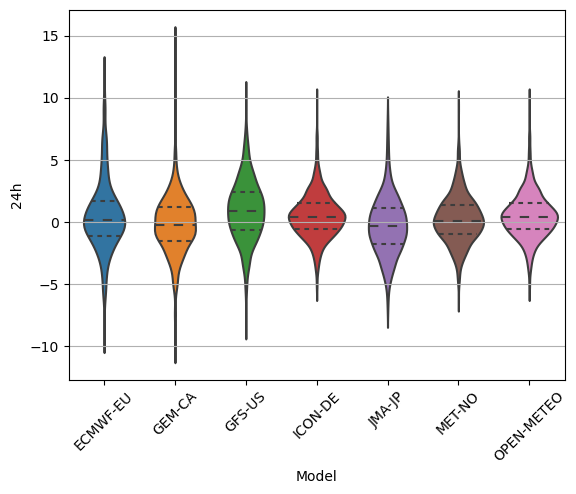

In [28]:
sns.set_style( {'axes.grid' : True})
sns.violinplot(data=allDataDiff, x="Model", y=["24h", "48h"], inner="quart", fill=False)
plt.xticks(rotation=45)